In [1]:
#分析以上不加入SOC算法网络和SDKN网络提取Koopman系数的特征值
#The following file paths are all absolute paths. You can replace them with relative paths at runtime, and the files are located in their respective folders.
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import gym
import matplotlib.pyplot as plt
import random
import argparse
from collections import OrderedDict
from copy import copy
import scipy
import scipy.linalg
import sys
#sys.path.append("control/utility/")
sys.path.append("D:/毕业设计/中期/Python/MPC_trykoopman/control/train/")
from Utility import data_collecter
sys.path.append("D:/毕业设计/中期/Python/MPC_trykoopman/control/utility/")
import mpc
#import lqr
import os


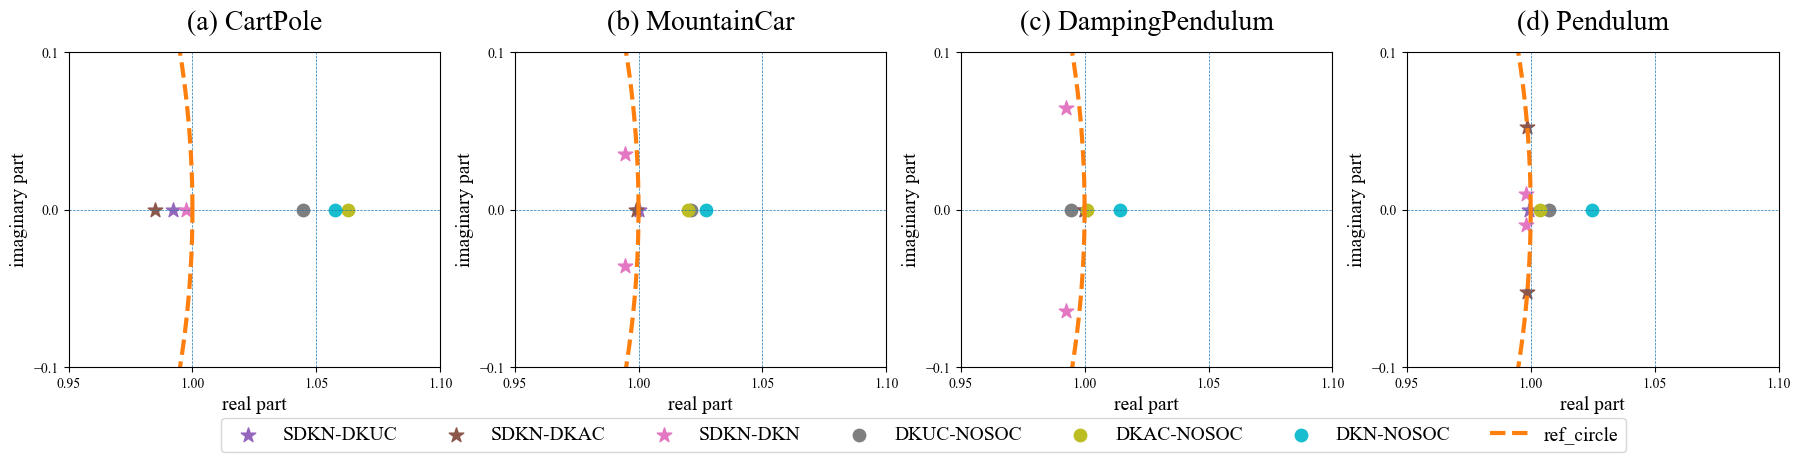

In [1]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
font = {'size': 12}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.95
plt.rcParams['figure.subplot.bottom'] = 0.2
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
plt.rcParams['savefig.dpi'] = 500 #图片像素
labels = ["*","*","BaseNet","KoopmanRNN","SDKN-DKUC","SDKN-DKAC","SDKN-DKN","DKUC-NOSOC","DKAC-NOSOC","DKN-NOSOC","ref_circle"]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(19, 4.5))
plt.rc('font', **font)
s_size = 80
titles = ["(a) CartPole","(b) MountainCar", "(c) DampingPendulum","(d) Pendulum"]
T = []
ref_circle = []
theta = np.linspace(0, 2*np.pi, 10000)
radius = 1
x = radius * np.cos(theta)
y = radius * np.sin(theta)
for i in range(4):
    for j in range(4,7):
        data = np.load("D:/毕业设计/中期/Python/MPC_trykoopman/control/SOC_compare/model_compare_data/eig{}{}.npy".format(j,i))
        if data.imag==0:
            ax[i].scatter(data.real,data.imag,marker = '*',c = colors[j],s = s_size+40,label=labels[j])
        else:
            ax[i].scatter(data.real,data.imag,marker ='*',c = colors[j],s = s_size+40,label=labels[j])
            ax[i].scatter(data.real,-data.imag,marker ='*',c = colors[j],s = s_size+40)
    for j in range(7,10):
        data = np.load("D:/毕业设计/中期/Python/MPC_trykoopman/control/SOC_compare/model_compare_data/eig{}{}.npy".format(j,i))
        if data.imag==0:
            ax[i].scatter(data.real,data.imag,marker = 'o',c = colors[j],s = s_size,label=labels[j])
        else:
            ax[i].scatter(data.real,data.imag,marker ='o',c = colors[j],s = s_size,label=labels[j])
            ax[i].scatter(data.real,-data.imag,marker ='o',c = colors[j],s = s_size)
    ax[i].plot(x,y,"--",color = colors[1],linewidth=3,label=labels[-1])
    ax[i].set_xlabel("real part",fontsize=14)
    ax[i].set_ylabel("imaginary part",fontsize=14)
    ax[i].set_ylim([-0.1,0.1])
    ax[i].yaxis.set_major_locator(MultipleLocator(0.1))
    ax[i].set_xlim([0.95,1.1])
    ax[i].xaxis.set_major_locator(MultipleLocator(0.05))
    ax[i].grid(True, linestyle='--', color=colors[0], linewidth=0.5)
    ax[i].set_title(titles[i],fontsize=20)
plt.legend(bbox_to_anchor=(-1.3, -0.3), loc='lower center', ncol=7 ,fontsize=14)#bbox_to_anchor=(-0.7, -0.4),
#plt.savefig("D:/毕业设计/论文/pictures/SOC_short_predict/short/"+"eig_models.png")
plt.show()